# Applying simple Principal Component Analysis (PCA)

## Reading OSA data: we are going to use EXTREME cases to have severe/healthy classes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import time

In [2]:
file = 'OSA_extreme_male.xlsx'
xl = pd.ExcelFile(file)

In [3]:
df_OSA = xl.parse('Sheet1')

In [4]:
df_OSA.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0002,hombre,29.6,119,174,56,48,Severe,39.305060
1,P0004,hombre,19.7,78,168,39,42,Severe,27.636054
2,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
3,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
4,P0009,hombre,22.0,72,165,40,42,Severe,26.446281


## We select data ("UNSUPERVISED"): no IAH nor OSA

In [5]:
features = ['Weight','Height','Age','Cervical','BMI']

In [6]:
df = df_OSA[features]

In [7]:
df.head()

,Weight,Height,Age,Cervical,BMI
0,119,174,56,48,39.305060
1,78,168,39,42,27.636054
2,80,173,32,40,26.729927
3,109,190,32,42,30.193906
4,72,165,40,42,26.446281


## Plot before scaling

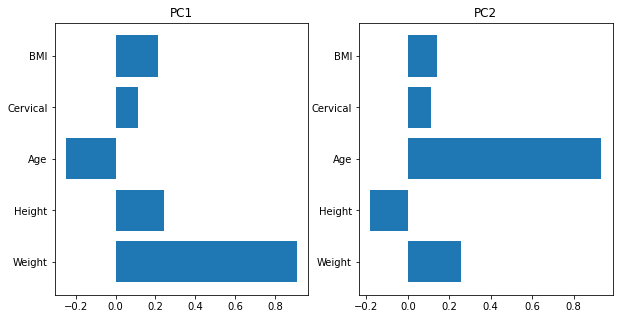

In [8]:
n_components = 5
pca = PCA(n_components = n_components)
pca.fit(df)
PC1 = pca.components_[0]
PC2 = pca.components_[1]

features = df.columns
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.barh(features,PC1)
plt.title("PC1")
plt.subplot(122)
plt.title("PC2")
plt.barh(features,PC2)
plt.show()

## Scaling before PCA

In [9]:
# Separating out the features
x = df_OSA.loc[:, features].values

# Separating out the target
y = df_OSA.loc[:,['OSA']].values

In [10]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [11]:
pd.DataFrame(data = x, columns = features).head()

,Weight,Height,Age,Cervical,BMI
0,2.104697,-0.187453,0.643040,2.217300,2.430726
1,-0.731293,-1.004027,-0.696048,0.146518,-0.267948
2,-0.592952,-0.323548,-1.247438,-0.543743,-0.477507
3,1.412992,1.990080,-1.247438,0.146518,0.323603
4,-1.146316,-1.412315,-0.617279,0.146518,-0.543105


In [12]:
scaler = StandardScaler()
scaler.fit(df)

X_scaled = scaler.transform(df)

In [13]:
# Verify normalization

print('Features means after normalization is:\n', list(np.mean(X_scaled,axis=0)))
print('\nStandard deviation after normalization is:\n', list(np.std(X_scaled,axis=0)))

Features means after normalization is:
 [-7.820438915598586e-17, 1.8322171173688118e-15, 1.0613452814026654e-16, 8.714203363095568e-16, -2.681293342490944e-16]

Standard deviation after normalization is:
 [0.9999999999999998, 1.0, 1.0000000000000002, 1.0, 1.0]


## Performing PCA

In [14]:
%matplotlib inline

# Try with the same number of components than features 
# Know what defines the limit
n_components = 5

pca = PCA(n_components = n_components)

# Defaults number of PCs to number of columns in imported data (ie. number of features)
# but can be set to any integer less than or equal to that value

pca.fit(df)

PCA(n_components=5)

In [15]:
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [16]:
principalDf.head(5)

,PC1,PC2,PC3,PC4,PC5
0,3.902484,0.668738,-0.159780,-0.009403,-0.032010
1,-0.652845,0.408176,-0.986882,0.743684,0.028141
2,-1.055322,-0.584153,-0.981059,0.344291,0.009658
3,1.180860,-2.471662,0.285398,-0.226512,0.054304
4,-1.087501,0.808747,-1.091355,0.986962,0.065252


In [17]:
# Project data into PC space

# 0,1 denote PC1 and PC2
# change values for other PCs

PC1 = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
PC2 = pca.components_[1]

In [18]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [19]:
principalDf.head(5)

,PC1,PC2
0,3.902484,0.668738
1,-0.652845,0.408176
2,-1.055322,-0.584153
3,1.180860,-2.471662
4,-1.087501,0.808747


In [20]:
df_OSA[['OSA']].head()

,OSA
0,Severe
1,Severe
2,Healthy
3,Healthy
4,Severe


In [21]:
finalDf = pd.concat([principalDf, df_OSA[['OSA']]], axis = 1)
finalDf.head(5)

,PC1,PC2,OSA
0,3.902484,0.668738,Severe
1,-0.652845,0.408176,Severe
2,-1.055322,-0.584153,Healthy
3,1.180860,-2.471662,Healthy
4,-1.087501,0.808747,Severe


In [22]:
# Save the new data frame into an Excel: df_OSA_male_pca.xlsx
finalDf.to_excel('OSA_extreme_male_pca.xlsx', index = False)

## Plot after scaling

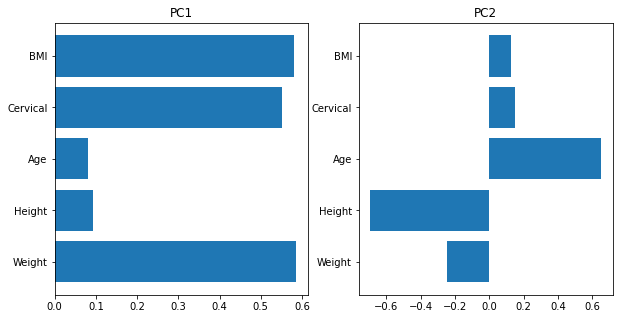

In [23]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.barh(features, PC1)
plt.title("PC1")
plt.subplot(122)
plt.title("PC2")
plt.barh(features, PC2)
plt.show()

## Cumulative explained variance

In [24]:
pca = PCA(n_components = 5)
pca.fit(df)

PCA(n_components=5)

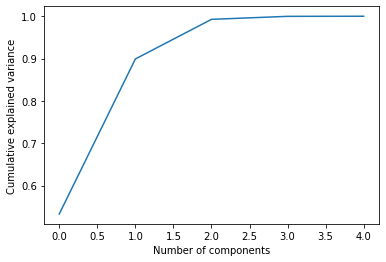

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [26]:
pca.explained_variance_ratio_

array([5.32923557e-01, 3.66167635e-01, 9.35884427e-02, 7.09191921e-03,
       2.28446936e-04])

In [27]:
pca = PCA(n_components = 2)
pca.fit(df)

PCA(n_components=2)

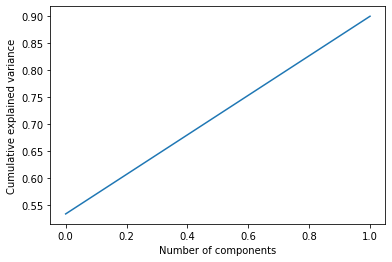

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [29]:
pca.explained_variance_ratio_

array([0.53292356, 0.36616763])

## Visualize 2D Projection

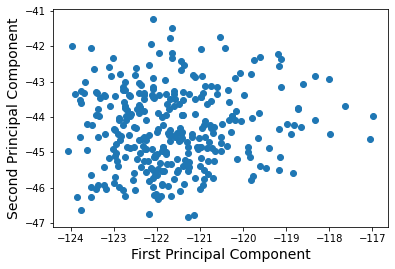

In [30]:
## Project data into PC space

Z1 = pca.transform(X_scaled)[:,0] # see 'prcomp(my_data)$x' in R
Z2 = pca.transform(X_scaled)[:,1]

plt.scatter(Z1, Z2)

plt.xlabel("First Principal Component", fontsize = 14)
plt.ylabel("Second Principal Component", fontsize = 14)
plt.show()

## Adding SUPERVISED information: Severe and Healthy

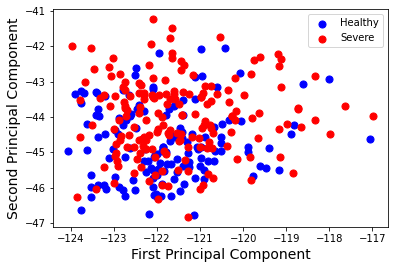

In [31]:
# First method

group = df_OSA['OSA']
cdict = {'Severe': 'red', 'Healthy': 'blue'}

fig, ax = plt.subplots()
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(Z1[ix], Z2[ix], c = cdict[g], label = g, s = 50)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
ax.legend()
plt.show()

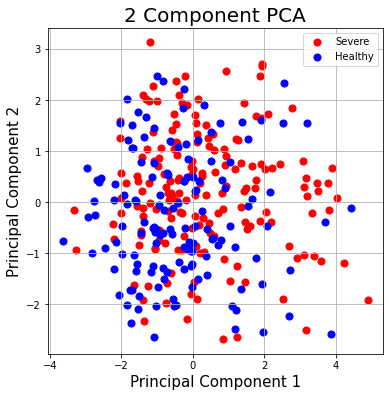

In [32]:
# Second method

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Severe', 'Healthy']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['OSA'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## t-SNE

In [33]:
time_start = time.time()

OSA_tsne = TSNE(random_state = 123).fit_transform(X_scaled)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1.2884066104888916 seconds


In [34]:
OSA_tsne.shape

(318, 2)

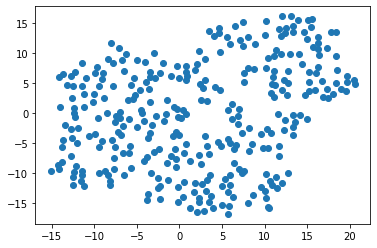

In [35]:
plt.scatter(OSA_tsne[:,0], OSA_tsne[:,1])
plt.show()

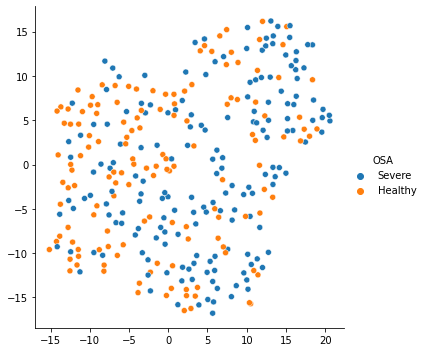

In [36]:
sns.relplot(x = OSA_tsne[:,0], y = OSA_tsne[:,1], hue = "OSA", data = df_OSA);